In [20]:
# CREATING X, Y
from tensorflow.keras import models, layers
import os
import cv2
import numpy as np

TRAIN_DIR = "R:/AA_Sign_Language/CNN+Image/Gestures_test"

num_classes=24
IMG_SIZE = 100
def vectorize_data(TRAIN_DIR):
    result = []
    labels = []
    for label in os.listdir(TRAIN_DIR):
        path=""
        path=os.path.join(TRAIN_DIR, label)
        for img in os.listdir(path):
            path2=""
            path2 = os.path.join(path, img)
            i = cv2.imread(path2)
            #i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
            
            i = cv2.resize(cv2.imread(path2, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
            
            
            result.append(i)
            labels.append(label)
    
    return result, labels

x, y =vectorize_data(TRAIN_DIR)
x_train = np.array(x)
y_train = np.array(y)

x_train = np.expand_dims(x_train, axis=-1)
x_train.shape

(30531, 100, 100, 1)

In [21]:
from tensorflow.keras.utils import to_categorical
dictonary = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'M':11, 'N':12, 'O':13, 'P':14, 
            'Q':15, 'R':16, 'S':17, 'T':18, 'U':19, 'V':20, 'W':21, 'X':22, 'Y':23}
num_classes=24
keys, inv = np.unique(y_train, return_inverse=True)
vals = np.array([dictonary[key] for key in keys])
y_train_new = vals[inv]
y_train_new_cat = to_categorical(y_train_new, num_classes)


'''
keys, inv = np.unique(y_test, return_inverse=True)
vals = np.array([dictonary[key] for key in keys])
y_test_new = vals[inv]
y_test_new_cat = to_categorical(y_test_new,num_classes=24)
'''
# SHUFFLE
def unison_shuffled_copies(a, b):
    p = np.random.permutation(len(a))
    return a[p], b[p]
x_new,y_new = unison_shuffled_copies(x_train,y_train_new_cat)

In [22]:
# MODEL CREATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
IMG_SIZE = 100

num_classes = 24
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=(IMG_SIZE, IMG_SIZE, 1), activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=SGD(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#np.expand_dims(i, axis=0)

In [23]:
history=model.fit(x_new, y_new, epochs = 30, validation_split = 0.1, shuffle = True, batch_size = 2)

Epoch 1/30
13739/13739 [==============================] - 294s 21ms/step - loss: 0.5262 - accuracy: 0.8513 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2/30
13739/13739 [==============================] - 290s 21ms/step - loss: 0.0372 - accuracy: 0.9894 - val_loss: 3.1638e-04 - val_accuracy: 1.0000
Epoch 3/30
13739/13739 [==============================] - 268s 20ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 6.6924e-05 - val_accuracy: 1.0000
Epoch 4/30
13739/13739 [==============================] - 293s 21ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 3.2732e-05 - val_accuracy: 1.0000
Epoch 5/30
13739/13739 [==============================] - 297s 22ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 4.7881e-05 - val_accuracy: 1.0000
Epoch 6/30
13739/13739 [==============================] - 295s 21ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 2.3546e-05 - val_accuracy: 1.0000
Epoch 7/30
13739/13739 [==============================] - 296s 22ms/step - loss: 0.006

In [26]:
model.save("trained_model.h5")

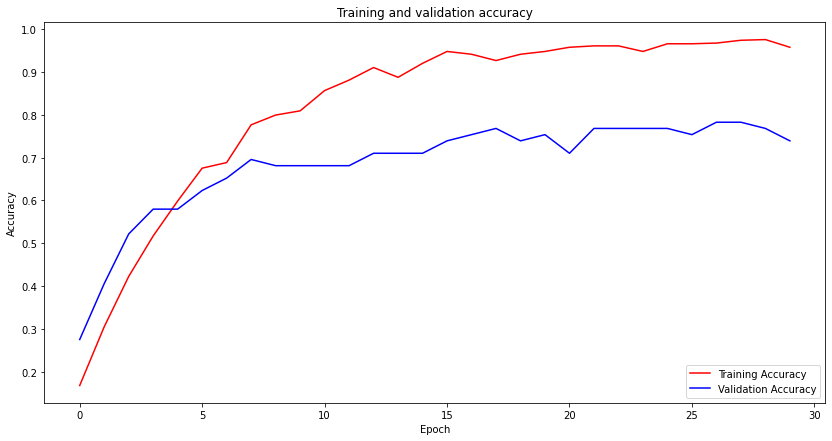

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

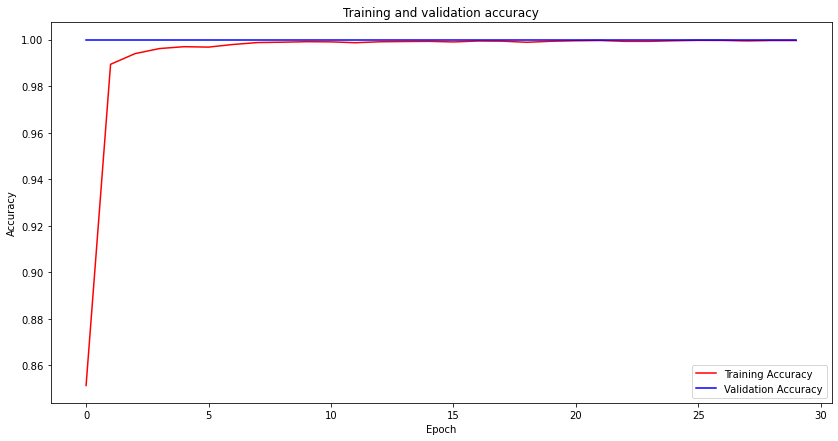

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()